___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

## Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. <b>The goal of the project</b> is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [2]:
def reset():
  df=pd.read_csv("treetypes.csv")

In [3]:
df=pd.read_csv("treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.shape

(250000, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [7]:
df.Cover_Type.value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

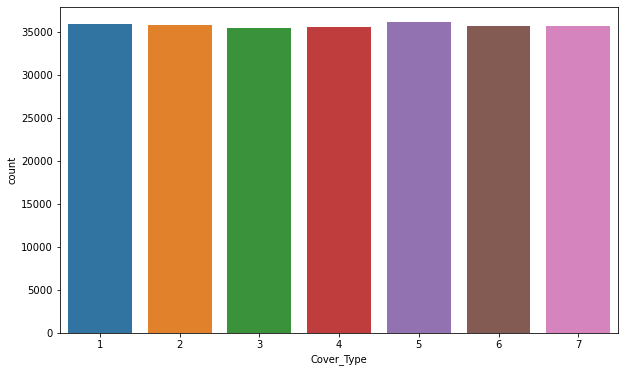

In [8]:
sns.countplot(df.Cover_Type)

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [9]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [10]:
#derivative of 
#https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/
def list_outliers(data, threshold = 3):
  outlier = []
  #count = 0
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
        #count+=1
  return outlier

In [11]:
len(list_outliers(df["Horizontal_Distance_To_Hydrology"]))

4588

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

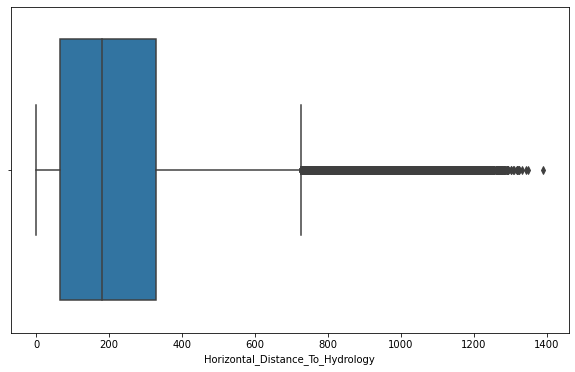

In [12]:
sns.boxplot(df.Horizontal_Distance_To_Hydrology)

In [ ]:
len(list_outliers(df["Vertical_Distance_To_Hydrology"]))

3591

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

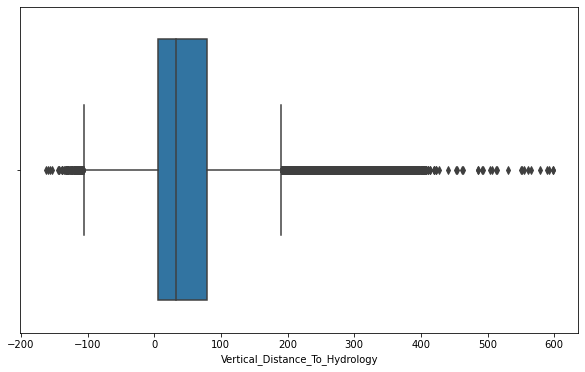

In [13]:
sns.boxplot(df.Vertical_Distance_To_Hydrology)

We will drop values less than 0 in next part.

In [ ]:
len(list_outliers(df["Horizontal_Distance_To_Roadways"]))

2635

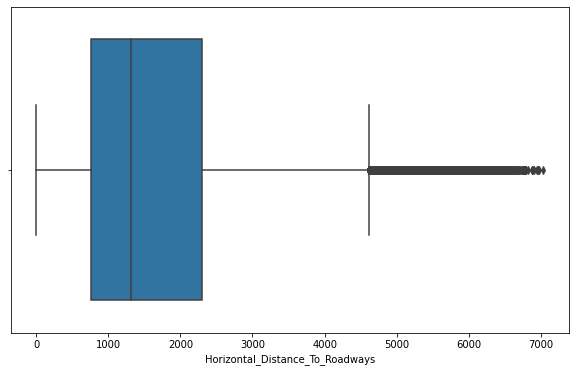

In [ ]:
sns.boxplot(df.Horizontal_Distance_To_Roadways)

In [ ]:
len(list_outliers(df["Horizontal_Distance_To_Fire_Points"]))

5437

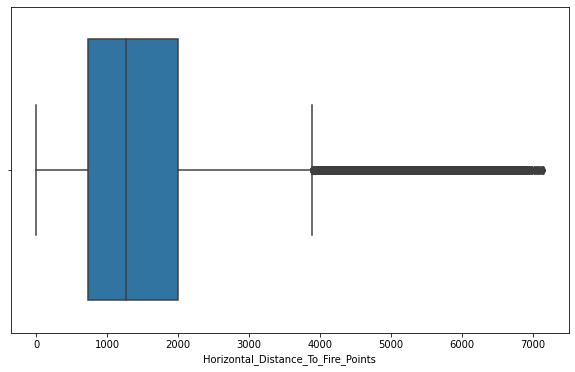

In [ ]:
sns.boxplot(df.Horizontal_Distance_To_Fire_Points)

##### Visualize outliers

In [14]:
def viz_outliers(data, ref_col, cols_num=3):
  index = 0
  cols=cols_num
  rows=len(data.columns)/cols
  plt.figure(figsize=(5*cols,5*rows))
  for feature in data.columns:
     if feature != "Cover_Type":
        index += 1
        plt.subplot(rows,cols,index)
        sns.boxplot(x='Cover_Type',y=feature,data=data)

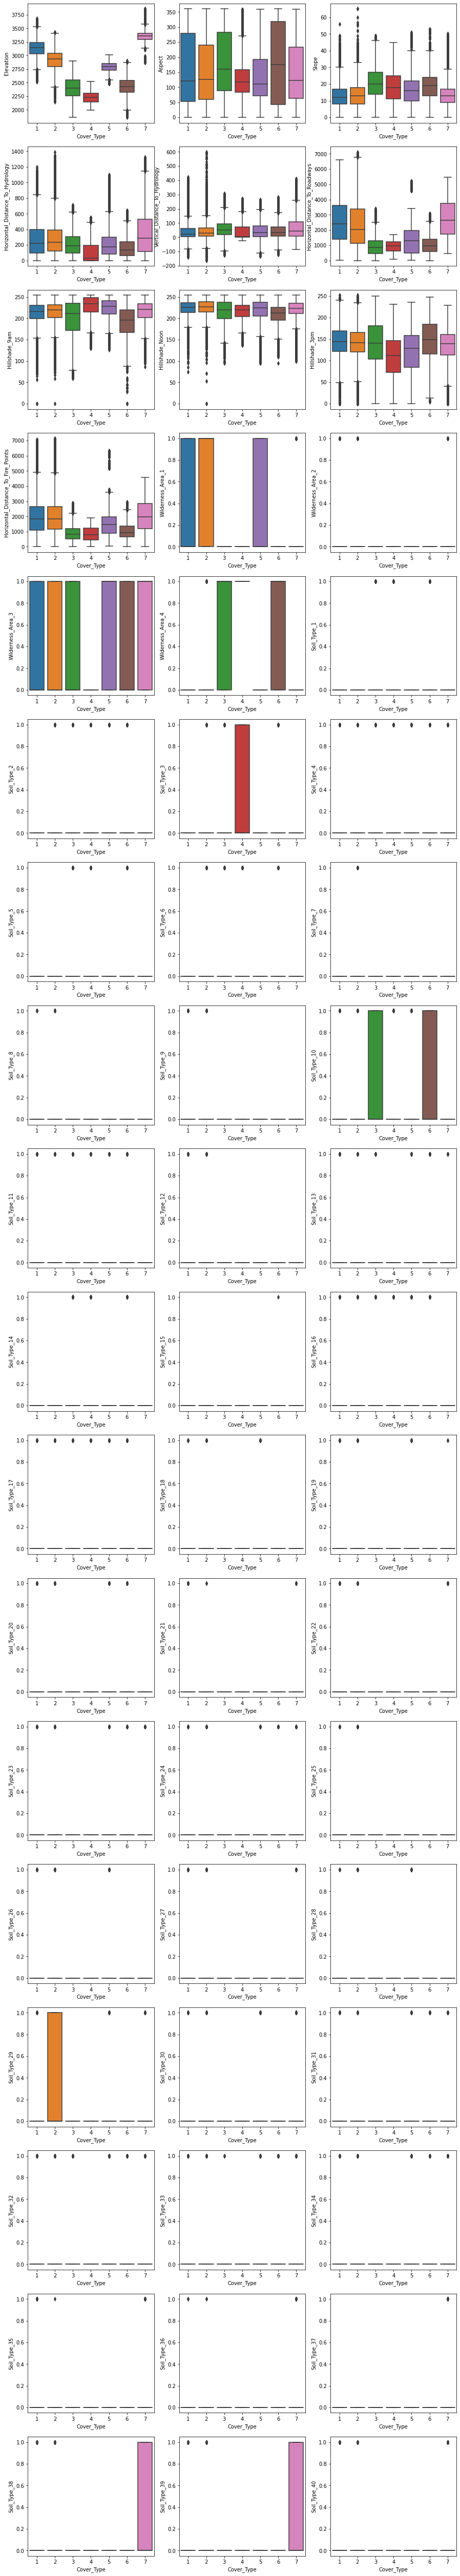

In [ ]:
viz_outliers(df, "Cover_Type")

In [ ]:
sum(df["Wilderness_Area_2"])

8340

In [ ]:
len(list_outliers(df["Hillshade_9am"]))

0

In [ ]:
len(list_outliers(df["Hillshade_Noon"]))

0

In [ ]:
sum(df["Soil_Type_9"])

153

### Deal with Outliers

#### *iii. Drop Outliers*

In [ ]:
#derivative of 
#https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/
def show_outliers(data, threshold=3):
  count = 0
  col_names = []
  for label, vals in data.items():
    #print(col)
    mean = np.mean(vals)
    std = np.std(vals)
    any = False
    for i,val in enumerate(vals[:]):
      if std != 0: 
        z = (val-mean)/std
        #print(val)
        if z > threshold:
          any = True
          count+=1
    if any:
      #print(label)
      col_names.append(label)       
  return count, col_names

In [ ]:
cnt, names = show_outliers(df)
cnt, names

(220604,
 ['Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_2',
  'Soil_Type_1',
  'Soil_Type_2',
  'Soil_Type_3',
  'Soil_Type_4',
  'Soil_Type_5',
  'Soil_Type_6',
  'Soil_Type_7',
  'Soil_Type_8',
  'Soil_Type_9',
  'Soil_Type_11',
  'Soil_Type_12',
  'Soil_Type_13',
  'Soil_Type_14',
  'Soil_Type_15',
  'Soil_Type_16',
  'Soil_Type_17',
  'Soil_Type_18',
  'Soil_Type_19',
  'Soil_Type_20',
  'Soil_Type_21',
  'Soil_Type_22',
  'Soil_Type_23',
  'Soil_Type_24',
  'Soil_Type_25',
  'Soil_Type_26',
  'Soil_Type_27',
  'Soil_Type_28',
  'Soil_Type_29',
  'Soil_Type_30',
  'Soil_Type_31',
  'Soil_Type_32',
  'Soil_Type_33',
  'Soil_Type_34',
  'Soil_Type_35',
  'Soil_Type_36',
  'Soil_Type_37',
  'Soil_Type_38',
  'Soil_Type_39',
  'Soil_Type_40'])

I tried a code to drop automatically where it dropped so many rows. Therefore we should do it manually. 
 We will not touch binary columns (dummies).

The only columns to drop from: 
* Slope
* Horizontal_Distance_To_Hydrology
* Vertical_Distance_To_Hydrology
* Horizontal_Distance_To_Roadways
* Horizontal_Distance_To_Fire_Points</li>

##### Define IQR limits

In [ ]:
#boxplots:  https://www.simplypsychology.org/boxplots.html
#code:      https://stackoverflow.com/questions/62330801/how-to-get-min-and-max-values-from-boxplot-in-python
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [l,u]

In [ ]:
down,up = iqr_fence(df["Slope"])
down, up

(0, 39)

In [ ]:
df[(df.Slope<down) | (df.Slope>up)].shape

(0, 55)

In [ ]:
df_=df[(df.Slope>=down) & (df.Slope<=up)]
df_.shape

(248818, 55)

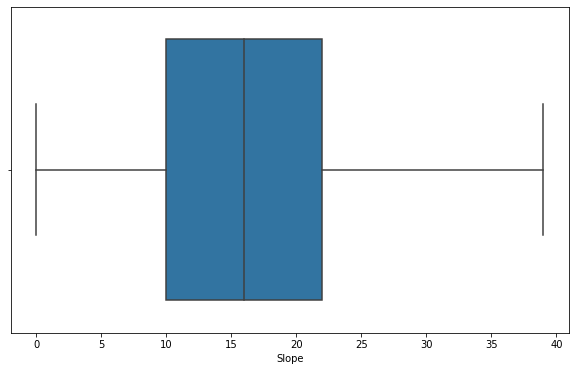

In [ ]:
sns.boxplot(df_.Slope)

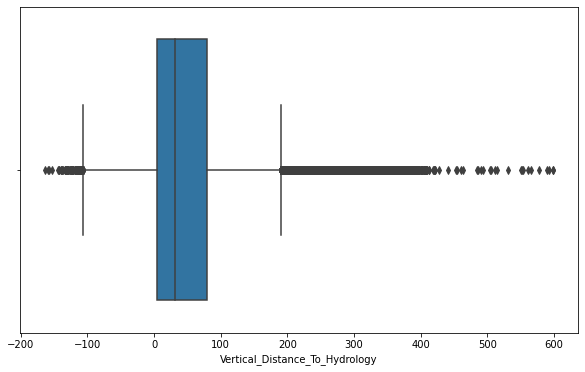

In [ ]:
sns.boxplot(df.Vertical_Distance_To_Hydrology)

In [ ]:
ref_data = df.Vertical_Distance_To_Hydrology
down,up = iqr_fence(ref_data)
print(f"{down} |--| {up}")
df_=df_[(df_.Vertical_Distance_To_Hydrology>=down) & (df_.Vertical_Distance_To_Hydrology<=up)]
df_.shape

-105 |--| 189


(239539, 55)

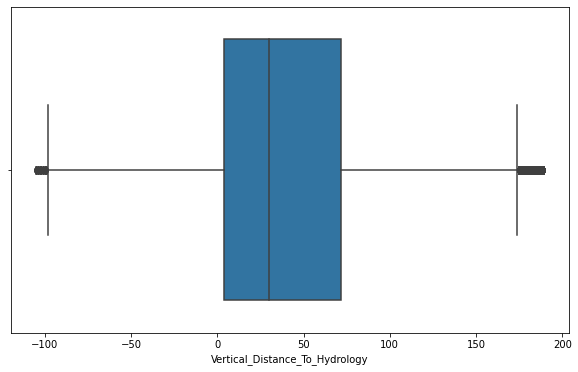

In [ ]:
sns.boxplot(df_.Vertical_Distance_To_Hydrology)

In [ ]:
ref_data = df.Horizontal_Distance_To_Hydrology
down,up = iqr_fence(ref_data)
print(f"{down}|--|{up}")
df_=df_[(df_.Horizontal_Distance_To_Hydrology>=down) & (df_.Horizontal_Distance_To_Hydrology<=up)]
df_.shape

0|--|725


(234568, 55)

In [ ]:
down,up = iqr_fence(df.Horizontal_Distance_To_Roadways)
print(f"{down}|--|{up}")
df_= df_[(df_.Horizontal_Distance_To_Roadways>=down) & (df_.Horizontal_Distance_To_Roadways<=up)]
df_.shape

0|--|4600


(223249, 55)

In [ ]:
down,up = iqr_fence(df.Horizontal_Distance_To_Fire_Points)
print(f"{down}|--|{up}")
df_= df_[(df_.Horizontal_Distance_To_Fire_Points>=down) & (df_.Horizontal_Distance_To_Fire_Points<=up)]
df_.shape

0|--|3893


(215282, 55)

#####Let's visualize the final version

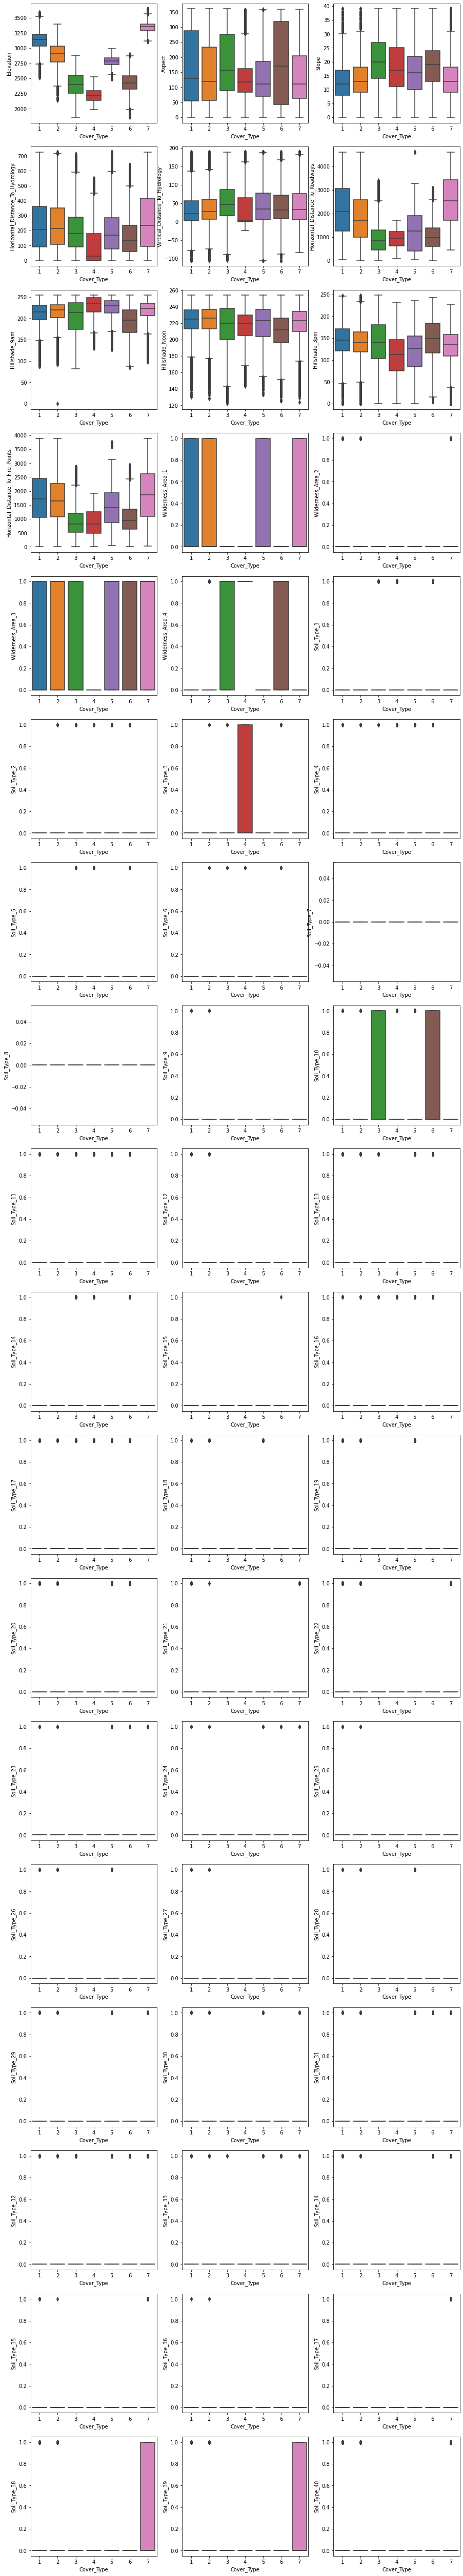

In [ ]:
viz_outliers(df_, "Cover_Type")

In [ ]:
df_.Cover_Type.value_counts()

6    35266
4    34637
3    33612
5    31739
1    27068
7    26816
2    26144
Name: Cover_Type, dtype: int64

### A closer look at correlation of continuous columns

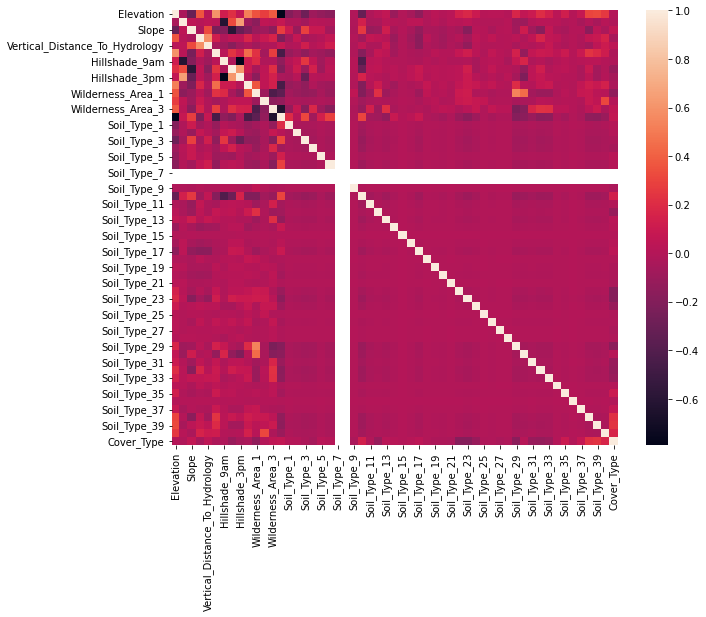

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_.corr())#, annot=True)

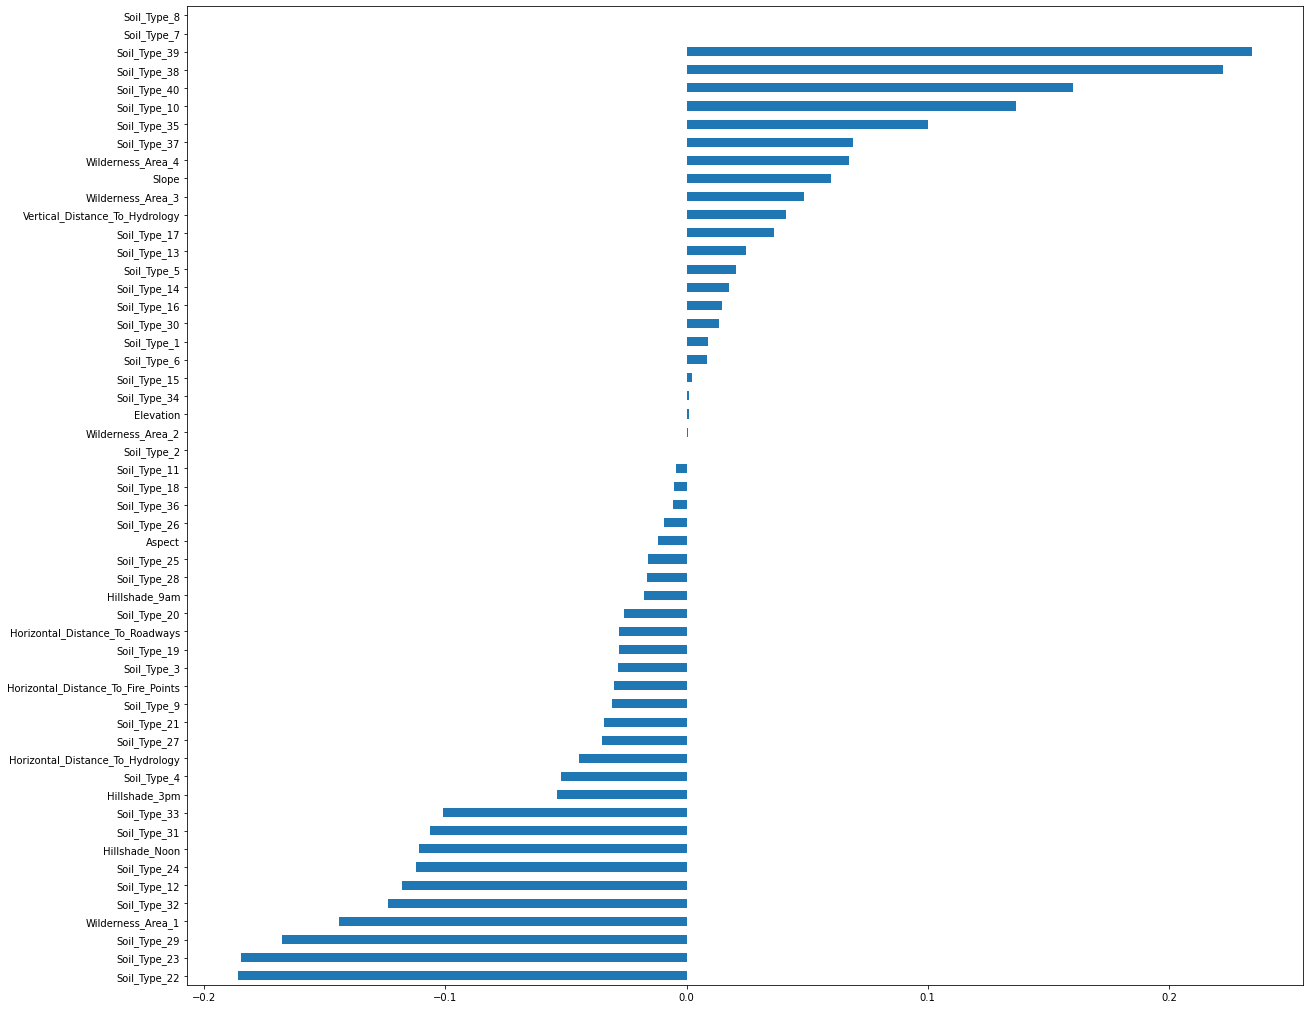

In [ ]:
plt.figure(figsize=(20,18))
df_.corr()["Cover_Type"].drop("Cover_Type").sort_values().plot.barh()

***
***

## 3. Feature Engineering

### Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. 
- So that there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, I decide to drop these columns. Because I have new columns which represent more value than them.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [ ]:
df_["Distance_to_Hydrology"] = np.sqrt(df_["Horizontal_Distance_To_Hydrology"]**2 + df_["Vertical_Distance_To_Hydrology"]**2)
df_["Distance_to_Hydrology"]

0        217.366
2        361.292
3        321.753
4        520.551
5         85.094
           ...  
249994   351.256
249995    51.865
249996   290.878
249997     0.000
249998     0.000
Name: Distance_to_Hydrology, Length: 215282, dtype: float64

In [ ]:
df_["avg_Distance_Hyd_Road"] = (df_["Horizontal_Distance_To_Hydrology"] + df_["Horizontal_Distance_To_Roadways"])/2.0

In [ ]:
df_["avg_Elevation"] = (df_["Elevation"] + df_["Vertical_Distance_To_Hydrology"])/2.0
df_["avg_Elevation"]

0        1372.000
2        1693.500
3        1511.000
4        1683.000
5        1429.500
           ...   
249994   1338.500
249995   1064.500
249996   1509.500
249997   1168.000
249998   1281.500
Name: avg_Elevation, Length: 215282, dtype: float64

In [ ]:
df_.drop(["Vertical_Distance_To_Hydrology"], axis=1, inplace=True)
df_.drop(["Horizontal_Distance_To_Hydrology"], axis=1, inplace=True)

In [ ]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,215282.000,2699.126,409.323,1859.000,2341.000,2695.000,3030.000,3644.000
Aspect,215282.000,155.208,109.154,0.000,65.000,123.000,257.000,360.000
Slope,215282.000,16.651,8.175,0.000,10.000,16.000,22.000,39.000
Horizontal_Distance_To_Roadways,215282.000,1456.554,1012.469,0.000,702.000,1225.000,1985.000,4600.000
Hillshade_9am,215282.000,212.520,30.993,0.000,195.000,220.000,236.000,254.000
Hillshade_Noon,215282.000,217.947,22.507,122.000,206.000,221.000,234.000,254.000
Hillshade_3pm,215282.000,133.445,46.392,0.000,103.000,136.000,167.000,248.000
Horizontal_Distance_To_Fire_Points,215282.000,1330.439,810.201,0.000,698.000,1179.000,1825.000,3893.000
Wilderness_Area_1,215282.000,0.191,0.393,0.000,0.000,0.000,0.000,1.000
Wilderness_Area_2,215282.000,0.031,0.174,0.000,0.000,0.000,0.000,1.000


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_.drop(["Cover_Type"], axis=1)
y = df_["Cover_Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test, label):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
    scores = {label+"": {"1. Accuracy_train" : accuracy_score(y_train, y_train_pred),
                         "2. F1_train" : f1_score(y_train, y_train_pred, average="weighted"),
                         "3. Accuracy_test" : accuracy_score(y_test, y_test_pred),
                         "4. F1_test" : f1_score(y_test, y_test_pred, average="weighted")
                         }}
    return pd.DataFrame(scores)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

### Implement Support Vector Machine
- Import the module 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

##### Without Scaling the Data

In [ ]:
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [ ]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[  79    0    0    0 5093    1  241]
 [   6    0    7   13 5107   64   32]
 [   0    0  431 1762 2800 1728    1]
 [   0    0   61 6827   12   28    0]
 [   0    0    0    0 6332   10    6]
 [   0    0  143 1599 2719 2592    0]
 [   0    0    0    0 2652    0 2711]]
              precision    recall  f1-score   support

           1       0.93      0.01      0.03      5414
           2       0.00      0.00      0.00      5229
           3       0.67      0.06      0.12      6722
           4       0.67      0.99      0.80      6928
           5       0.26      1.00      0.41      6348
           6       0.59      0.37      0.45      7053
           7       0.91      0.51      0.65      5363

    accuracy                           0.44     43057
   macro avg       0.57      0.42      0.35     43057
weighted avg       0.58      0.44      0.37     43057


Train_Set
[[  275     0     0     0 20392     4   983]
 [   36     0    32   101 20313   311   122]
 [    0     0  1689  7162 

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LinearSVC(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy    nan
test_precision   nan
test_recall      nan
test_f1          nan
dtype: float64

##### With Scaling (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC( multi_class='ovr', random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', LinearSVC(random_state=42))])

In [ ]:
svm_scores = eval_metric(pipe_model, X_train, y_train, X_test, y_test, "Lin SVC")

Test_Set
[[3633  631    8    0  418   74  650]
 [1473 2067  154    2 1178  316   39]
 [   0   18 3269  956  427 2052    0]
 [   0    0  378 6276    0  274    0]
 [ 163  759  525    0 4464  437    0]
 [   1  202 1057  802  624 4367    0]
 [ 568    1    0    0   32    0 4762]]
              precision    recall  f1-score   support

           1       0.62      0.67      0.65      5414
           2       0.56      0.40      0.46      5229
           3       0.61      0.49      0.54      6722
           4       0.78      0.91      0.84      6928
           5       0.62      0.70      0.66      6348
           6       0.58      0.62      0.60      7053
           7       0.87      0.89      0.88      5363

    accuracy                           0.67     43057
   macro avg       0.66      0.67      0.66     43057
weighted avg       0.66      0.67      0.66     43057


Train_Set
[[14525  2419    24     0  1630   295  2761]
 [ 5626  8467   571    19  4757  1302   173]
 [    0    72 12923  3879 

In [ ]:
svm_scores

,Lin SVC
1. Accuracy_train,0.668
2. F1_train,0.660
3. Accuracy_test,0.670
4. F1_test,0.662


In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

Cross Validate

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy    nan
test_precision   nan
test_recall      nan
test_f1          nan
dtype: float64

##### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

In [ ]:
param_grid = {'SVC__C' : [0.001, 0.05, 0.01, 0.1],
              #'SVC__gamma' : ["scale", "auto", 0.2, 0.3],
              #'SVC__kernel' : ['rbf', 'linear']
              }

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(class_weight='balanced',random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring='recall', cv=10)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        LinearSVC(class_weight='balanced',
                                                  random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1]}, scoring='recall')

In [ ]:
svm_model_grid.best_params_

{'SVC__C': 0.001}

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.244,0.053,0.024,0.001,0.001,{'SVC__C': 0.001},nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
1,3.971,0.060,0.023,0.001,0.050,{'SVC__C': 0.05},nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2
2,2.904,0.031,0.024,0.003,0.010,{'SVC__C': 0.01},nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3
3,5.224,0.084,0.024,0.002,0.100,{'SVC__C': 0.1},nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4


In [ ]:
svm_model_grid.best_index_

0

In [ ]:
svm_model_grid.best_score_

nan

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3505  835    7    0  403   60  604]
 [1396 2273  155    6 1099  260   40]
 [   0   40 3048 1192  447 1995    0]
 [   0    0  445 6198    0  285    0]
 [ 368 1103  558    0 3992  309   18]
 [  22  261 1039 1013  842 3876    0]
 [ 875   39    0    0   36    0 4413]]
              precision    recall  f1-score   support

           1       0.57      0.65      0.61      5414
           2       0.50      0.43      0.46      5229
           3       0.58      0.45      0.51      6722
           4       0.74      0.89      0.81      6928
           5       0.59      0.63      0.61      6348
           6       0.57      0.55      0.56      7053
           7       0.87      0.82      0.85      5363

    accuracy                           0.63     43057
   macro avg       0.63      0.63      0.63     43057
weighted avg       0.63      0.63      0.63     43057


Train_Set
[[13970  3370    24     0  1570   234  2486]
 [ 5270  9388   539    47  4361  1130   180]
 [    0   132 12117  4771 

In [ ]:
svm_model_grid.best_params_

{'SVC__C': 0.001}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(C= 0.001,  
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    nan
test_precision   nan
test_recall      nan
test_f1          nan
dtype: float64

In [ ]:
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,3.081,0.024,nan,nan,nan,nan
2,3.189,0.024,nan,nan,nan,nan
3,3.242,0.027,nan,nan,nan,nan
4,3.203,0.024,nan,nan,nan,nan
5,3.132,0.024,nan,nan,nan,nan
6,3.233,0.024,nan,nan,nan,nan
7,3.108,0.024,nan,nan,nan,nan
8,3.114,0.023,nan,nan,nan,nan
9,3.183,0.024,nan,nan,nan,nan
10,3.221,0.024,nan,nan,nan,nan


### Implement Decision Tree Classifier
- Import the module 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)

In [ ]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = DT_model.predict(X_test)

##### Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

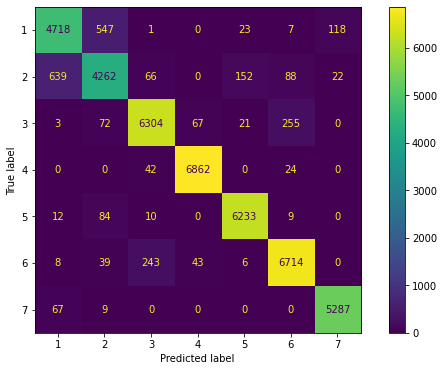

In [ ]:
plot_confusion_matrix(DT_model,X_test,y_test);

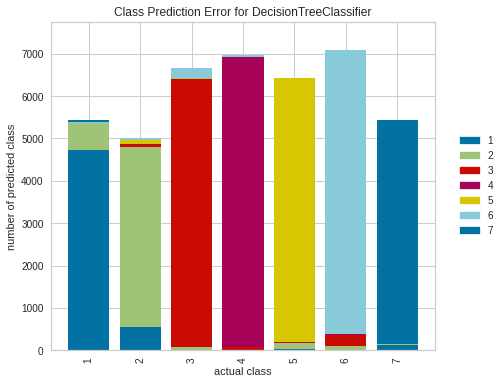

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [ ]:
DT_scores = eval_metric(DT_model, X_train, y_train, X_test, y_test, "DT")

Test_Set
[[4718  547    1    0   23    7  118]
 [ 639 4262   66    0  152   88   22]
 [   3   72 6304   67   21  255    0]
 [   0    0   42 6862    0   24    0]
 [  12   84   10    0 6233    9    0]
 [   8   39  243   43    6 6714    0]
 [  67    9    0    0    0    0 5287]]
              precision    recall  f1-score   support

           1       0.87      0.87      0.87      5414
           2       0.85      0.82      0.83      5229
           3       0.95      0.94      0.94      6722
           4       0.98      0.99      0.99      6928
           5       0.97      0.98      0.98      6348
           6       0.95      0.95      0.95      7053
           7       0.97      0.99      0.98      5363

    accuracy                           0.94     43057
   macro avg       0.93      0.93      0.93     43057
weighted avg       0.94      0.94      0.94     43057


Train_Set
[[21654     0     0     0     0     0     0]
 [    0 20915     0     0     0     0     0]
 [    0     0 26890     0 

In [ ]:
table = pd.concat([svm_scores, DT_scores], axis=1)
table

,Lin SVC,DT
1. Accuracy_train,0.668,1.000
2. F1_train,0.660,1.000
3. Accuracy_test,0.670,0.938
4. F1_test,0.662,0.937


##### Cross Validate

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [ ]:
model = DecisionTreeClassifier(max_depth=None, random_state=42) 

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,3.122,0.060,0.937,0.937,0.937,0.937
2,2.871,0.041,0.932,0.932,0.932,0.932
3,2.918,0.041,0.935,0.935,0.935,0.935
4,2.900,0.043,0.941,0.941,0.941,0.941
5,2.937,0.041,0.934,0.934,0.934,0.934
6,2.910,0.040,0.933,0.933,0.933,0.933
7,3.150,0.059,0.935,0.935,0.935,0.935
8,4.022,0.059,0.932,0.932,0.932,0.932
9,3.239,0.040,0.935,0.935,0.935,0.935
10,2.838,0.039,0.938,0.938,0.938,0.938


In [ ]:
df_scores.mean()[2:]

test_accuracy          0.935
test_precision_micro   0.935
test_recall_micro      0.935
test_f1_micro          0.935
dtype: float64

In [ ]:
DT_model.feature_importances_

array([4.06818253e-01, 2.91604780e-02, 1.54105806e-02, 1.05369620e-01,
       3.39946053e-02, 2.55284690e-02, 2.00433626e-02, 9.54580894e-02,
       2.11645037e-02, 1.52814409e-03, 8.96820988e-03, 2.47301818e-03,
       1.44477531e-03, 7.33342281e-03, 2.17388042e-02, 1.81863440e-02,
       6.35276004e-04, 3.44769438e-03, 0.00000000e+00, 0.00000000e+00,
       5.48324809e-05, 3.54308582e-02, 4.42964527e-03, 8.88138591e-04,
       3.37123310e-03, 3.36664183e-04, 0.00000000e+00, 4.70861081e-04,
       5.57253216e-04, 1.35806196e-05, 2.70196408e-04, 1.56937458e-03,
       2.23501235e-05, 2.22245679e-03, 2.14580969e-03, 1.94002223e-03,
       0.00000000e+00, 7.10467509e-04, 7.20719393e-05, 1.01680865e-04,
       3.22496644e-03, 1.11714149e-03, 2.88064747e-03, 4.44954019e-03,
       2.73806837e-03, 4.47554321e-04, 1.43152837e-03, 1.30737005e-05,
       0.00000000e+00, 2.42816014e-03, 5.08574646e-03, 5.53084673e-04,
       7.40673607e-02, 2.82519799e-02])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Soil_Type_15,0.000
Soil_Type_25,0.000
Soil_Type_37,0.000
Soil_Type_8,0.000
Soil_Type_7,0.000
Soil_Type_36,0.000
Soil_Type_18,0.000
Soil_Type_21,0.000
Soil_Type_9,0.000
Soil_Type_27,0.000


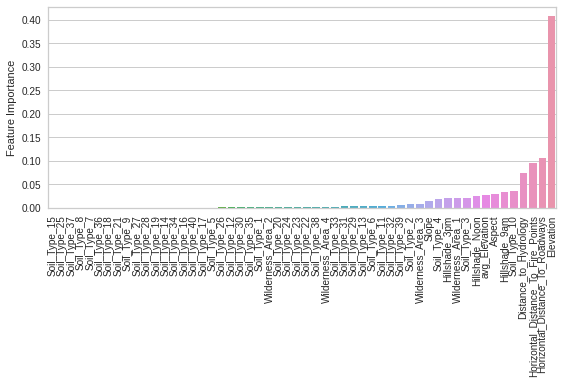

In [ ]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

##### Grid Search

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],       
              "max_depth": [None, 2,3, 4, 5],                              
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [ ]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

PicklingError: ignored

In [ ]:
grid_model.best_params_

In [ ]:
DT2_model = DecisionTreeClassifier(random_state=42)

In [ ]:
DT2_scores = eval_metric(DT2_model, X_train, y_train, X_test, y_test, "DT")
DT2_scores

In [ ]:
table = pd.concat(svm_scores, DT2_scores)

### Implement Random Forest Classifier
- Import the module 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
RF_scores = eval_metric(RF_model, X_train, y_train, X_test, y_test, "RF")

Test_Set
[[4904  403    2    0   19    4   82]
 [ 424 4506   82    0  119   90    8]
 [   0    4 6493   55   11  159    0]
 [   0    0    6 6921    0    1    0]
 [   0    6    2    0 6336    4    0]
 [   0    0   82   23    2 6946    0]
 [  11    0    0    0    0    0 5352]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.91      5414
           2       0.92      0.86      0.89      5229
           3       0.97      0.97      0.97      6722
           4       0.99      1.00      0.99      6928
           5       0.98      1.00      0.99      6348
           6       0.96      0.98      0.97      7053
           7       0.98      1.00      0.99      5363

    accuracy                           0.96     43057
   macro avg       0.96      0.96      0.96     43057
weighted avg       0.96      0.96      0.96     43057


Train_Set
[[21654     0     0     0     0     0     0]
 [    0 20915     0     0     0     0     0]
 [    0     0 26890     0 

##### Model Performance

In [ ]:
table = pd.concat([table, RF_scores], axis=1)
table

,Lin SVC,DT,RF,RF
1. Accuracy_train,0.668,1.000,1.000,1.000
2. F1_train,0.660,1.000,1.000,1.000
3. Accuracy_test,0.670,0.938,0.963,0.963
4. F1_test,0.662,0.937,0.962,0.962


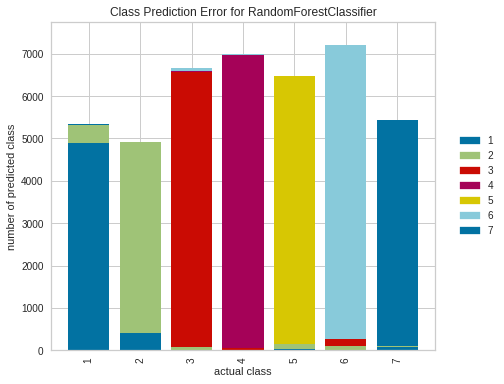

In [ ]:
visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Implement XGBoost Classifer
- Import the module 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', random_state=42)

##### Model Performance

In [ ]:
xgb_scores = eval_metric(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")
table = pd.concat([table, xgb_scores], axis=1)
table

Test_Set
[[3709  615    6    0  307   21  756]
 [1297 2186  130    2 1235  310   69]
 [   0    1 4277  526  203 1715    0]
 [   0    0  183 6683    0   62    0]
 [   9  129  145    0 5867  198    0]
 [   0    0 1347  285  178 5243    0]
 [ 271    0    0    0    0    0 5092]]
              precision    recall  f1-score   support

           1       0.70      0.69      0.69      5414
           2       0.75      0.42      0.54      5229
           3       0.70      0.64      0.67      6722
           4       0.89      0.96      0.93      6928
           5       0.75      0.92      0.83      6348
           6       0.69      0.74      0.72      7053
           7       0.86      0.95      0.90      5363

    accuracy                           0.77     43057
   macro avg       0.76      0.76      0.75     43057
weighted avg       0.76      0.77      0.76     43057


Train_Set
[[14783  2428    12     0  1220   119  3092]
 [ 4985  9277   495     9  4672  1184   293]
 [    0     4 17148  2180 

,Lin SVC,DT,RF,RF,XGBoost
1. Accuracy_train,0.668,1.000,1.000,1.000,0.772
2. F1_train,0.660,1.000,1.000,1.000,0.763
3. Accuracy_test,0.670,0.938,0.963,0.963,0.768
4. F1_test,0.662,0.937,0.962,0.962,0.758


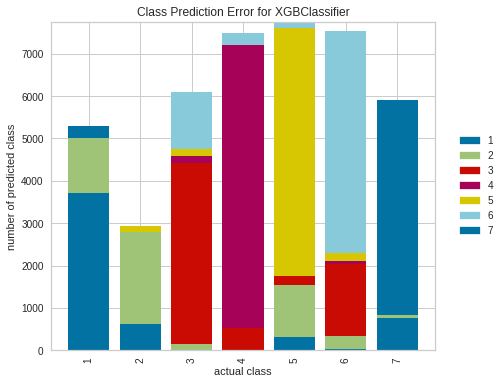

In [ ]:
visualizer = ClassPredictionError(xgb_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

In [ ]:
table

,Lin SVC,DT,RF,RF,XGBoost
1. Accuracy_train,0.668,1.000,1.000,1.000,0.772
2. F1_train,0.660,1.000,1.000,1.000,0.763
3. Accuracy_test,0.670,0.938,0.963,0.963,0.768
4. F1_test,0.662,0.937,0.962,0.962,0.758


XGBoost did not give good results with default parameters. But it can be defined with parameter setting to get better metrics.

Best accuracy was given by Random Forest with default parameters.

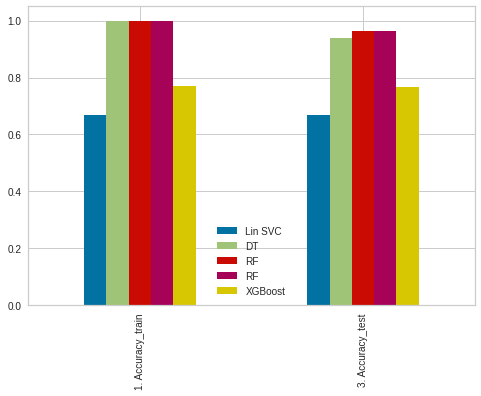

In [334]:
table.loc[["1. Accuracy_train","3. Accuracy_test"]].plot.bar()

# F1 Score Comparison

Random Forest is the winner of F1 scores. Linear SVC performed the worst. XGBoost algorithm would give better results if the parameter setting can be arranged accordingly.



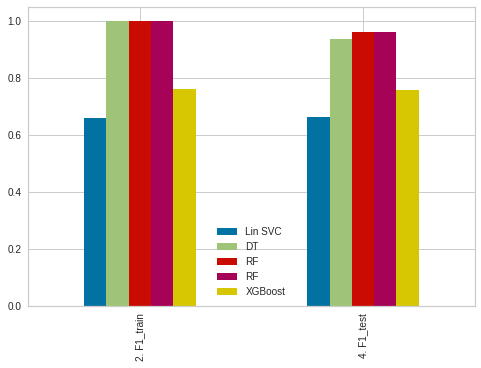

In [335]:
table.loc[["2. F1_train","4. F1_test"]].plot.bar()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___